In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
v86 = pd.read_table("data/v86_gene_count_annotation.txt")
v76 = pd.read_table("data/v76_gene_count_annotation.txt")
v86.set_index("GeneID", inplace=True)
v76.set_index("GeneID", inplace=True)

In [4]:
v86["Segments"] = v86["Chr"].str.split(";").apply(len)
v76["Segments"] = v76["Chr"].str.split(";").apply(len)

In [5]:
inboth = v86.index[v86.index.isin(v76.index)]

In [6]:
differ = inboth[(v86.loc[inboth] != v76.loc[inboth]).all(axis=1)]
differ_any = inboth[(v86.loc[inboth] != v76.loc[inboth]).any(axis=1)]

In [7]:
diffstart = inboth[v86.loc[inboth, "Start"] != v76.loc[inboth, "Start"]]
diffchr = inboth[v86.loc[inboth, "Chr"] != v76.loc[inboth, "Chr"]]     

In [8]:
v86.head()

Chr  \
GeneID                                   
ENSG00000223972                1;1;1;1   
ENSG00000227232  1;1;1;1;1;1;1;1;1;1;1   
ENSG00000278267                      1   
ENSG00000243485                  1;1;1   
ENSG00000237613                  1;1;1   

                                                             Start  \
GeneID                                                               
ENSG00000223972                            11869;12613;12975;13221   
ENSG00000227232  14404;15005;15796;16607;16858;17233;17606;1791...   
ENSG00000278267                                              17369   
ENSG00000243485                                  29554;30267;30976   
ENSG00000237613                                  34554;35245;35721   

                                                               End  \
GeneID                                                               
ENSG00000223972                            12227;12721;13052;14409   
ENSG00000227232  14501;15038;15947;16765;17055;17368;17742;1806...   
ENSG00000278267                                              17436   
ENSG00000243485                                  30039;30667;31109   
ENSG00000237613                                  35174;35481;36081   

                                Strand  Length  Segments  
GeneID                                                    
ENSG00000223972                +;+;+;+    1735         4  
ENSG00000227232  -;-;-;-;-;-;-;-;-;-;-    1351        11  
ENSG00000278267                      -      68         1  
ENSG00000243485                  +;+;+    1021         3  
ENSG00000237613                  -;-;-    1219         3

In [25]:
(v86.loc[inboth] != v76.loc[inboth]).sum()

Chr         1448
Start       2292
End         2294
Strand      1451
Length      2700
Segments    1440
dtype: int64

I think I would like to expand these a little.

* I want to know if more/ different exons have

In [9]:
(v86.loc[inboth] != v76.loc[inboth]).sum()

Chr         1448
Start       2292
End         2294
Strand      1451
Length      2700
Segments    1440
dtype: int64

In [10]:
import itertools

In [11]:
comparison = v86.loc[inboth] != v76.loc[inboth]
for i,j in itertools.combinations(v86.columns, 2):
    s = (comparison[i] & comparison[j]).sum()
    print("{} + {} : {}".format(i, j, s))
    print("\t{} : {}".format(i, s / comparison[i].sum()))
    print("\t{} : {}".format(j, s / comparison[j].sum()))

Chr + Start : 1448
	Chr : 1.0
	Start : 0.631762652705061
Chr + End : 1448
	Chr : 1.0
	End : 0.6312118570183086
Chr + Strand : 1443
	Chr : 0.9965469613259669
	Strand : 0.994486560992419
Chr + Length : 1445
	Chr : 0.9979281767955801
	Length : 0.5351851851851852
Chr + Segments : 1440
	Chr : 0.994475138121547
	Segments : 1.0
Start + End : 1873
	Start : 0.8171902268760908
	End : 0.8164777680906713
Start + Strand : 1451
	Start : 0.6330715532286213
	Strand : 1.0
Start + Length : 2279
	Start : 0.9943280977312391
	Length : 0.8440740740740741
Start + Segments : 1440
	Start : 0.6282722513089005
	Segments : 1.0
End + Strand : 1450
	End : 0.6320836965998257
	Strand : 0.9993108201240524
End + Length : 2281
	End : 0.9943330427201394
	Length : 0.8448148148148148
End + Segments : 1440
	End : 0.6277244986922407
	Segments : 1.0
Strand + Length : 1446
	Strand : 0.9965541006202618
	Length : 0.5355555555555556
Strand + Segments : 1440
	Strand : 0.9924190213645762
	Segments : 1.0
Length + Segments : 1438
	Le

In [ ]:
for i in list(itertools.product((True, False), repeat=comparison.columns.size)):
    

In [12]:
import collections

In [13]:
collections.Counter(comparison.itertuples(index=False))

Counter({Pandas(Chr=False, Start=False, End=False, Strand=False, Length=False, Segments=False): 52899,
         Pandas(Chr=False, Start=False, End=True, Strand=False, Length=True, Segments=False): 421,
         Pandas(Chr=False, Start=True, End=False, Strand=False, Length=True, Segments=False): 418,
         Pandas(Chr=False, Start=True, End=False, Strand=True, Length=True, Segments=False): 1,
         Pandas(Chr=False, Start=True, End=True, Strand=False, Length=False, Segments=False): 8,
         Pandas(Chr=False, Start=True, End=True, Strand=False, Length=True, Segments=False): 410,
         Pandas(Chr=False, Start=True, End=True, Strand=True, Length=False, Segments=False): 2,
         Pandas(Chr=False, Start=True, End=True, Strand=True, Length=True, Segments=False): 5,
         Pandas(Chr=True, Start=True, End=True, Strand=False, Length=True, Segments=False): 5,
         Pandas(Chr=True, Start=True, End=True, Strand=True, Length=False, Segments=False): 1,
         Pandas(Chr=True, S

Going through every geneid, figuring out what has changed. Note, if a segment is added or removed, all fields will change since all fields will have a different amount of entries. What we see here is a little more than half of the gtf annotations which changed have had segments added or removed.

In [14]:
d = collections.Counter()
for i in comparison.itertuples(index=False):
    d[tuple(comparison.columns[list(i)])] += 1
d

Counter({(): 52899,
         ('Chr', 'Start', 'End', 'Length'): 5,
         ('Chr', 'Start', 'End', 'Strand'): 1,
         ('Chr', 'Start', 'End', 'Strand', 'Length'): 2,
         ('Chr', 'Start', 'End', 'Strand', 'Length', 'Segments'): 1438,
         ('Chr', 'Start', 'End', 'Strand', 'Segments'): 2,
         ('End', 'Length'): 421,
         ('Start', 'End'): 8,
         ('Start', 'End', 'Length'): 410,
         ('Start', 'End', 'Strand'): 2,
         ('Start', 'End', 'Strand', 'Length'): 5,
         ('Start', 'Length'): 418,
         ('Start', 'Strand', 'Length'): 1})

In [15]:
diffseg = comparison.index[comparison["Segments"]]

In [132]:
vin = np.vectorize(lambda x, y: x in y)

In [140]:
not_in = np.invert(vin(v76.loc[diffseg, "Chr"], v86.loc[diffseg, "Chr"]) | vin(v86.loc[diffseg, "Chr"] , v76.loc[diffseg, "Chr"]))

In [143]:
not_in.sum()

1

In [ ]:
def added_segment(x, y)
    """Determines whether a position was changed or if a segment"""

In [141]:
v76.loc[diffseg][not_in]

Chr          Start            End Strand  Length  Segments
GeneID                                                                     
ENSG00000250210  8;8  192091;200392  192298;200563    -;-     380         2

In [142]:
v86.loc[diffseg][not_in]

Chr      Start        End Strand  Length  Segments
GeneID                                                            
ENSG00000250210   9  138286248  138286430      +     183         1

In [155]:
tmp1 = v76.loc[diffseg, "Start"].str.split(";").map(set)
tmp2 = v86.loc[diffseg, "Start"].str.split(";").map(set)
vsubset = np.vectorize(lambda x, y: x.issubset(y))
vsubset(tmp1, tmp2) |

array([ True,  True, False, ..., False,  True,  True], dtype=bool)

In [160]:
not_in = np.invert(vsubset(tmp1, tmp2) | vsubset(tmp2, tmp1))

In [162]:
diffseg[not_in]

Index(['ENSG00000230021', 'ENSG00000228327', 'ENSG00000107404',
       'ENSG00000248333', 'ENSG00000116151', 'ENSG00000215912',
       'ENSG00000227372', 'ENSG00000162592', 'ENSG00000233304',
       'ENSG00000232596',
       ...
       'ENSG00000273590', 'ENSG00000235609', 'ENSG00000229425',
       'ENSG00000232079', 'ENSG00000227456', 'ENSG00000224790',
       'ENSG00000205622', 'ENSG00000182093', 'ENSG00000160185',
       'ENSG00000188155'],
      dtype='object', name='GeneID', length=629)

In [127]:
[v76.loc[i,"Chr"] in v86.loc[i, "Chr"] for i in diffseg]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [ ]:
np.array((v76.loc[i,"Chr"] in v76.loc[i, "Chr"] for i in tmp), dtype=pe=pe=bool

In [32]:
from collections import namedtuple

I want each segment split out of its gene and made it's own row in the dataframe. To to this I will iterate over the rows of the dataframe, keeping the fields:

* `GeneID`
* `Start`
* `End`
* `Strand`
* Should I keep order in segment?

In [79]:
from itertools import chain

In [68]:
LongRow = namedtuple("LongRow", ["GeneID", "Start", "End", "Strand"])

In [90]:
def split_row(row):
    """Splits one row from a gtf into segments."""
    geneid = row.GeneID
    starts = row.Start.split(";")
    ends = row.End.split(";")
    strands = row.Strand.split(";")
    for i in range(0, len(starts)):
        yield LongRow(GeneID=geneid,
                      Start=starts[i],
                      End=ends[i],
                      Strand=strands[i])

In [76]:
tmp = v76.head()
tmp = tmp.reset_index()
tmp_df_iter = chain.from_iterable(split_row(r[1]) for r in tmp.iterrows())

In [77]:
tmp = pd.DataFrame.from_records(list(tmp_df_iter), columns=["GeneID", "Start", "End", "Strand"])

In [82]:
def split_segments(indf):
    """
    Splits each row from long dataframe into one row for each segment.
    """
    if indf.index.name == "GeneID":
        indf = indf.reset_index()
    longiter = chain.from_iterable(split_row(r[1]) for r in indf.iterrows())
    longdf = pd.DataFrame.from_records(longiter, columns=["GeneID", "Start", "End", "Strand"])
    return longdf

In [84]:
long76 = split_segments(v76)
long86 = split_segments(v86)

# upset test

Looking at better ways to visualize the overlap between sets. It's possible I'd want to look at these on a segment by segment basis, essentially transforming the 

In [19]:
import pyupset
from pickle import load

In [23]:
d = dict()
d["v86"] = v86.reset_index()
d["v76"] = v76.reset_index()

In [85]:
d = dict()
d["v86"] = long86
d["v76"] = long76

In [86]:
pyupset.plot(d)

{'additional': [],
 'base_set_size': <matplotlib.axes._subplots.AxesSubplot at 0x1276635c0>,
 'figure': <matplotlib.figure.Figure at 0x1216ba940>,
 'intersection_bars': <matplotlib.axes._subplots.AxesSubplot at 0x125e8eeb8>,
 'intersection_matrix': <matplotlib.axes._subplots.AxesSubplot at 0x1253b6c88>,
 'names': <matplotlib.axes._subplots.AxesSubplot at 0x125359a90>}

{'additional': [],
 'base_set_size': <matplotlib.axes._subplots.AxesSubplot at 0x10b7a3358>,
 'figure': <matplotlib.figure.Figure at 0x1125126a0>,
 'intersection_bars': <matplotlib.axes._subplots.AxesSubplot at 0x10c436550>,
 'intersection_matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11ead2898>,
 'names': <matplotlib.axes._subplots.AxesSubplot at 0x10c412470>}

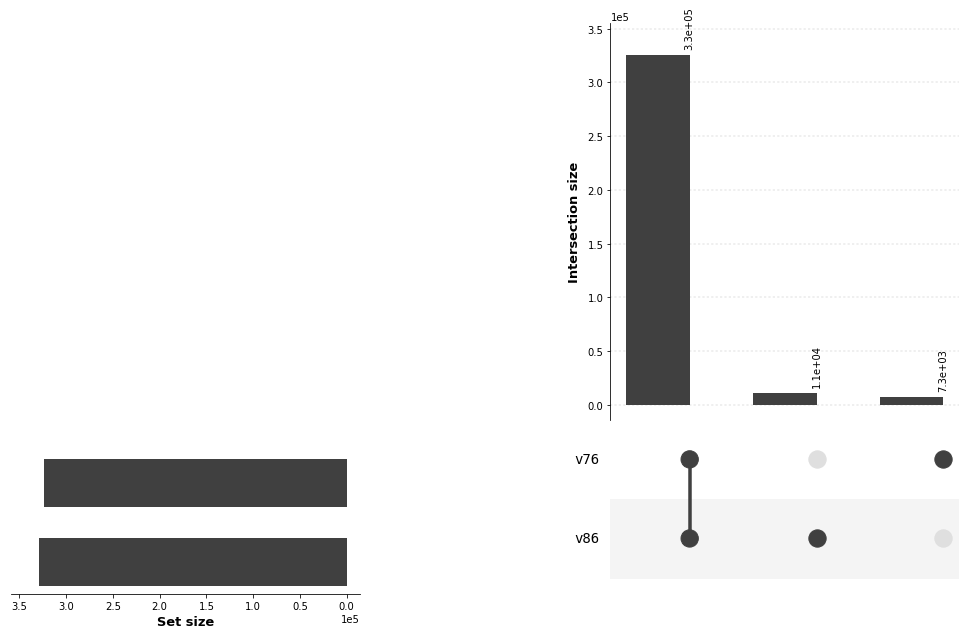

In [89]:
pyupset.plot(d, unique_keys=['Start', 'End'])